In [159]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import shap


C:\Users\minip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [136]:
#Covid transofromar en niveles de restricciones
df = pd.read_csv('../data/DF_modelos/df_industrial_total.csv')
df = df.drop(columns=['Sector_Economic','año','poblacion','velmedia','prec',])  

In [137]:
#Analizar los valores de df
df

,consumo,fecha,findesemana,festivos,lectivos,COVID,tmed,PIB,Empleo
0,995989,2019-01-01,0,1,0,0,8.590909,14279,604200
1,1702091,2019-01-02,0,0,0,0,6.617391,14279,604200
2,1826076,2019-01-03,0,0,0,0,5.604348,14279,604200
3,1806926,2019-01-04,0,0,0,0,5.004348,28632,604200
4,1341548,2019-01-05,1,0,0,0,6.173913,28632,604200
...,...,...,...,...,...,...,...,...,...
2003,1403736,2024-06-26,0,0,0,0,22.623810,16405,625100
2004,1365435,2024-06-27,0,0,0,0,23.776190,16405,625100
2005,1358576,2024-06-28,0,0,0,0,24.452381,16405,625100
2006,994740,2024-06-29,1,0,0,0,20.942857,16405,625100


In [139]:
index_primera_menor_1000 = df[df['consumo'] < 1000].index.min()

# Eliminar todas las filas desde ese índice en adelante
if index_primera_menor_1000 is not None:
    df = df.loc[:index_primera_menor_1000-1]

df

,consumo,fecha,findesemana,festivos,lectivos,COVID,tmed,PIB,Empleo
0,995989,2019-01-01,0,1,0,0,8.590909,14279,604200
1,1702091,2019-01-02,0,0,0,0,6.617391,14279,604200
2,1826076,2019-01-03,0,0,0,0,5.604348,14279,604200
3,1806926,2019-01-04,0,0,0,0,5.004348,28632,604200
4,1341548,2019-01-05,1,0,0,0,6.173913,28632,604200
...,...,...,...,...,...,...,...,...,...
1943,799363,2024-04-27,1,0,0,0,14.108696,16405,625100
1944,749970,2024-04-28,1,0,0,0,12.460870,16405,625100
1945,1066271,2024-04-29,0,0,1,0,11.617391,16405,625100
1946,1076872,2024-04-30,0,0,1,0,13.543478,16405,625100


In [140]:
#Consumo previo
df['t-1'] = df['consumo'].shift(1)
df['t-2'] = df['consumo'].shift(2)
df['t-3'] = df['consumo'].shift(3)
df

,consumo,fecha,findesemana,festivos,lectivos,COVID,tmed,PIB,Empleo,t-1,t-2,t-3
0,995989,2019-01-01,0,1,0,0,8.590909,14279,604200,NaN,NaN,NaN
1,1702091,2019-01-02,0,0,0,0,6.617391,14279,604200,995989.0,NaN,NaN
2,1826076,2019-01-03,0,0,0,0,5.604348,14279,604200,1702091.0,995989.0,NaN
3,1806926,2019-01-04,0,0,0,0,5.004348,28632,604200,1826076.0,1702091.0,995989.0
4,1341548,2019-01-05,1,0,0,0,6.173913,28632,604200,1806926.0,1826076.0,1702091.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1943,799363,2024-04-27,1,0,0,0,14.108696,16405,625100,1076123.0,1093059.0,1054506.0
1944,749970,2024-04-28,1,0,0,0,12.460870,16405,625100,799363.0,1076123.0,1093059.0
1945,1066271,2024-04-29,0,0,1,0,11.617391,16405,625100,749970.0,799363.0,1076123.0
1946,1076872,2024-04-30,0,0,1,0,13.543478,16405,625100,1066271.0,749970.0,799363.0


In [141]:
df.dropna(inplace=True)
df = df.reset_index(drop=True)
df

,consumo,fecha,findesemana,festivos,lectivos,COVID,tmed,PIB,Empleo,t-1,t-2,t-3
0,1806926,2019-01-04,0,0,0,0,5.004348,28632,604200,1826076.0,1702091.0,995989.0
1,1341548,2019-01-05,1,0,0,0,6.173913,28632,604200,1806926.0,1826076.0,1702091.0
2,1201714,2019-01-06,1,0,0,0,9.130435,28632,604200,1341548.0,1806926.0,1826076.0
3,1921881,2019-01-07,0,0,0,0,6.926087,42976,604200,1201714.0,1341548.0,1806926.0
4,2048335,2019-01-08,0,0,1,0,4.945455,42976,604200,1921881.0,1201714.0,1341548.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1940,799363,2024-04-27,1,0,0,0,14.108696,16405,625100,1076123.0,1093059.0,1054506.0
1941,749970,2024-04-28,1,0,0,0,12.460870,16405,625100,799363.0,1076123.0,1093059.0
1942,1066271,2024-04-29,0,0,1,0,11.617391,16405,625100,749970.0,799363.0,1076123.0
1943,1076872,2024-04-30,0,0,1,0,13.543478,16405,625100,1066271.0,749970.0,799363.0


In [142]:
#Formatear 
df['COVID'].replace(2,3,inplace=True)


C:\Users\minip\AppData\Local\Temp\ipykernel_19776\1001056524.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['COVID'].replace(2,3,inplace=True)


In [143]:
df['COVID'].replace(1,2,inplace=True)

C:\Users\minip\AppData\Local\Temp\ipykernel_19776\2916957206.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['COVID'].replace(1,2,inplace=True)


In [144]:
df['COVID'].replace(3,1,inplace=True)

C:\Users\minip\AppData\Local\Temp\ipykernel_19776\1387649947.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['COVID'].replace(3,1,inplace=True)


## Paso 1: Preparación de los datos.

In [145]:
df.dtypes

consumo          int64
fecha           object
findesemana      int64
festivos         int64
lectivos         int64
COVID            int64
tmed           float64
PIB              int64
Empleo           int64
t-1            float64
t-2            float64
t-3            float64
dtype: object

In [146]:
df.nunique()

consumo        1913
fecha          1945
findesemana       2
festivos          2
lectivos          2
COVID             3
tmed           1845
PIB              37
Empleo           21
t-1            1913
t-2            1913
t-3            1913
dtype: int64

In [147]:
df.shape

(1945, 12)

In [148]:
# Convertir la columna de fecha a formato datetime
df['fecha'] = pd.to_datetime(df['fecha'])

### *Transformación variable `Fecha`*

1. Convertir fechas a formato numérico (timestamp)

In [149]:

# Asegúrate de que la columna de fecha está en formato datetime
df['fecha'] = pd.to_datetime(df['fecha'], format='%Y')  # Ajusta el formato según tus datos

# Convertir la columna de fecha a timestamp
df['fecha'] = df['fecha'].astype(np.int64) // 10**9  # Convertir a dias


In [150]:
df['fecha'].tail

<bound method NDFrame.tail of 0       1546560000
1       1546646400
2       1546732800
3       1546819200
4       1546905600
           ...    
1940    1714176000
1941    1714262400
1942    1714348800
1943    1714435200
1944    1714521600
Name: fecha, Length: 1945, dtype: int64>

In [151]:
df

,consumo,fecha,findesemana,festivos,lectivos,COVID,tmed,PIB,Empleo,t-1,t-2,t-3
0,1806926,1546560000,0,0,0,0,5.004348,28632,604200,1826076.0,1702091.0,995989.0
1,1341548,1546646400,1,0,0,0,6.173913,28632,604200,1806926.0,1826076.0,1702091.0
2,1201714,1546732800,1,0,0,0,9.130435,28632,604200,1341548.0,1806926.0,1826076.0
3,1921881,1546819200,0,0,0,0,6.926087,42976,604200,1201714.0,1341548.0,1806926.0
4,2048335,1546905600,0,0,1,0,4.945455,42976,604200,1921881.0,1201714.0,1341548.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1940,799363,1714176000,1,0,0,0,14.108696,16405,625100,1076123.0,1093059.0,1054506.0
1941,749970,1714262400,1,0,0,0,12.460870,16405,625100,799363.0,1076123.0,1093059.0
1942,1066271,1714348800,0,0,1,0,11.617391,16405,625100,749970.0,799363.0,1076123.0
1943,1076872,1714435200,0,0,1,0,13.543478,16405,625100,1066271.0,749970.0,799363.0


## Paso 2:  Definición de la arquitectura de la red neuronal

1. Dividir los datos en características y objetivo

In [175]:
# Definir características (X) y objetivo (y)
X = df.drop(columns=['consumo'])  
y = df['consumo']  

test_size_percentage = 0.09
split_index = int(len(X) * (1 - test_size_percentage))

# Dividir en conjunto de entrenamiento (primera parte) y prueba (última parte)
X_train = X[:split_index]
X_test = X[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]

In [ ]:
X = pd.DataFrame(df[['findesemana', 't-1', 'festivos', 'COVID', 't-3']]) 

In [176]:
X_train

,fecha,findesemana,festivos,lectivos,COVID,tmed,PIB,Empleo,t-1,t-2,t-3
0,1546560000,0,0,0,0,5.004348,28632,604200,1826076.0,1702091.0,995989.0
1,1546646400,1,0,0,0,6.173913,28632,604200,1806926.0,1826076.0,1702091.0
2,1546732800,1,0,0,0,9.130435,28632,604200,1341548.0,1806926.0,1826076.0
3,1546819200,0,0,0,0,6.926087,42976,604200,1201714.0,1341548.0,1806926.0
4,1546905600,0,0,1,0,4.945455,42976,604200,1921881.0,1201714.0,1341548.0
...,...,...,...,...,...,...,...,...,...,...,...
1764,1698969600,0,0,1,0,11.795652,15942,618200,956640.0,649894.0,958533.0
1765,1699056000,1,0,0,0,13.352174,15942,618200,987631.0,956640.0,649894.0
1766,1699142400,1,0,0,0,13.986957,15942,618200,723071.0,987631.0,956640.0
1767,1699228800,0,0,1,0,12.304348,15942,618200,641971.0,723071.0,987631.0


In [177]:
X_test

,fecha,findesemana,festivos,lectivos,COVID,tmed,PIB,Empleo,t-1,t-2,t-3
1769,1699401600,0,0,1,0,9.947826,15942,618200,946200.0,924136.0,641971.0
1770,1699488000,0,0,1,0,11.004348,15942,618200,970004.0,946200.0,924136.0
1771,1699574400,0,0,1,0,13.321739,15942,618200,1005170.0,970004.0,946200.0
1772,1699660800,1,0,0,0,13.160870,15942,618200,976352.0,1005170.0,970004.0
1773,1699747200,1,0,0,0,16.591304,15942,618200,741344.0,976352.0,1005170.0
...,...,...,...,...,...,...,...,...,...,...,...
1940,1714176000,1,0,0,0,14.108696,16405,625100,1076123.0,1093059.0,1054506.0
1941,1714262400,1,0,0,0,12.460870,16405,625100,799363.0,1076123.0,1093059.0
1942,1714348800,0,0,1,0,11.617391,16405,625100,749970.0,799363.0,1076123.0
1943,1714435200,0,0,1,0,13.543478,16405,625100,1066271.0,749970.0,799363.0


In [178]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [179]:
# Definir el modelo XGBoost
model_xgb = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators=100, learning_rate=0.1)

# Entrenar el modelo con los datos de entrenamiento
model_xgb.fit(X_train_scaled, y_train)

# Realizar predicciones con los datos de prueba
y_pred = model_xgb.predict(X_test_scaled)

# Calcular el error cuadrático medio (RMSE) como métrica de evaluación
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')

# Obtener la importancia de las características
importancia = model_xgb.feature_importances_

# Crear un DataFrame para visualizar las importancias
feature_importance = pd.DataFrame({'Variable': X.columns, 'Importancia': importancia*100})
feature_importance = feature_importance.sort_values(by='Importancia', ascending=False)
# Mostrar las variables ordenadas por importancia
print(feature_importance)

RMSE: 111104.44489932737
       Variable  Importancia
1   findesemana    35.121994
8           t-1    34.206284
2      festivos     8.191628
4         COVID     5.111024
10          t-3     5.026258
3      lectivos     3.718533
0         fecha     3.075289
9           t-2     1.804918
5          tmed     1.672802
7        Empleo     1.165368
6           PIB     0.905913


C:\Users\minip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [160]:
# Crear un modelo de SHAP para un modelo de red neuronal o cualquier otro modelo
explainer = shap.KernelExplainer(model_xgb.predict, X_train_scaled)
shap_values = explainer.shap_values(X_test_scaled)

# Visualizar la importancia de las características
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns)

  9%|▊         | 15/176 [03:10<34:07, 12.72s/it]


KeyboardInterrupt: 

In [191]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
df_X_train_scaled=pd.DataFrame(X_train_scaled,columns=['findesemana', 't-1', 'festivos', 'COVID', 't-3','fecha', 'lectivos', 'tmed', 't-2','Empleo'])

vif = pd.Series([variance_inflation_factor(df_X_train_scaled.corr().values, i) for i in range(df_X_train_scaled.corr().shape[1])], index=df_X_train_scaled.columns)
vif

findesemana     5.901238
t-1            13.505370
festivos        1.983177
COVID          13.501047
t-3             7.154884
fecha           5.468283
lectivos        1.580818
tmed            8.713131
t-2            41.192990
Empleo         94.475250
consumo        26.830428
dtype: float64

In [88]:
print(X_train.isnull().sum())
print(X_test.isnull().sum())

fecha          0
findesemana    0
festivos       0
lectivos       0
covid          0
tmed           0
prec           0
velmedia       0
poblacion      0
pib            0
empleo         0
tendencia      0
dtype: int64
fecha          0
findesemana    0
festivos       0
lectivos       0
covid          0
tmed           0
prec           0
velmedia       0
poblacion      0
pib            0
empleo         0
tendencia      0
dtype: int64


2. Construir el modelo de red neuronal

In [89]:
#No vale, vale LSTM
# Inicializar el modelo
modelInd = Sequential()

# Añadir la capa de entrada
modelInd.add(Input(shape=(X_train.shape[1],)))  # Define la forma de entrada aquí

# Añadir la primera capa oculta
modelInd.add(Dense(units=64, activation='relu'))

# Añadir una segunda capa oculta (opcional)
modelInd.add(Dense(units=32, activation='relu'))

# Capa de salida
modelInd.add(Dense(units=1))  # Para una regresión, una sola neurona sin función de activación

# Compilar el modelo
modelInd.compile(optimizer='adam', loss='mean_squared_error')


3. Entrenar el modelo

In [90]:
# Entrenar el modelo
history = modelInd.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 453013084831744.0000 - val_loss: 9147347107840.0000
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3648515997696.0000 - val_loss: 268973375488.0000
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 74081034240.0000 - val_loss: 3711521792.0000
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1203707136.0000 - val_loss: 19522876.0000
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 40124744.0000 - val_loss: 19504808.0000
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 22362364.0000 - val_loss: 27854828.0000
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 25905944.0000 - val_loss: 22768776.0000
Epoch 8/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 22861808.0000 - val_loss: 21494732.0000
Epoch 9/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 21804016.0000 - val_loss: 19578954.0000
Epoch 10/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 25353704.0000 - val_l

4. Evaluar el modelo

In [91]:
test_loss = modelInd.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 17278806.0000
Test Loss: 18707876.0


## Paso 3: Evaluación del modelo y predicciones

1. Visualizar la pérdida durante el entrenamiento

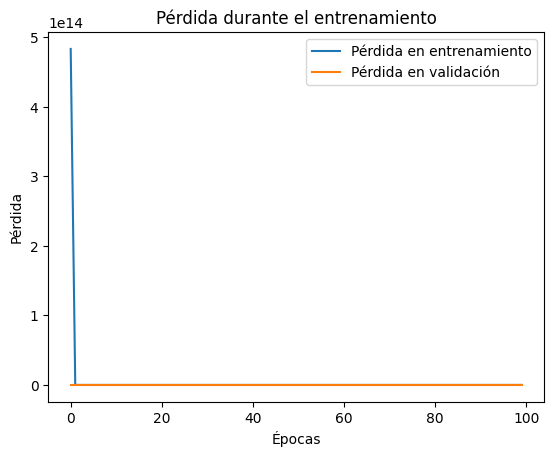

In [49]:
# Visualizar la pérdida durante el entrenamiento
plt.plot(history.history['loss'], label='Pérdida en entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

2. Evaluar el modelo en el conjunto de prueba

In [50]:
# Evaluar el modelo en el conjunto de prueba
test_loss = modelInd.evaluate(X_test, y_test)
print(f'Pérdida en el conjunto de prueba: {test_loss}')

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - loss: 0.9310
Pérdida en el conjunto de prueba: 0.9906675219535828


3. Hacer predicciones

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


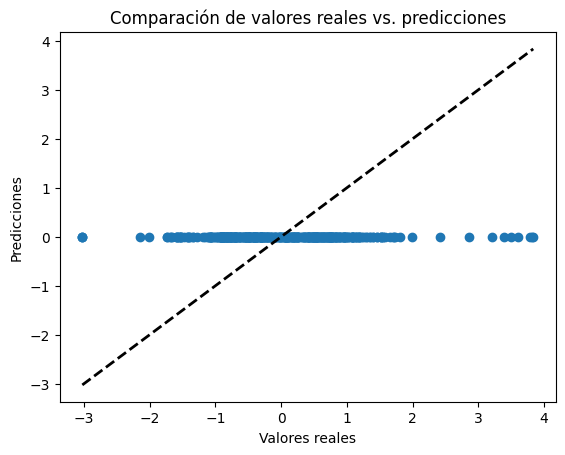

In [51]:
# Hacer predicciones
predicciones = modelInd.predict(X_test)

# Comparar predicciones con los valores reales
plt.scatter(y_test, predicciones)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Comparación de valores reales vs. predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Línea de identidad
plt.show()

4. Calcular métricas adicionales

In [52]:
mae = mean_absolute_error(y_test, predicciones)
rmse = mean_squared_error(y_test, predicciones, squared=False)

print(f'Error Absoluto Medio (MAE): {mae}')
print(f'Raíz del Error Cuadrático Medio (RMSE): {rmse}')


Error Absoluto Medio (MAE): 0.7780668025817723
Raíz del Error Cuadrático Medio (RMSE): 0.9953229219717292


C:\Users\minip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [53]:
#Extraccion del modelo a una crapeta
# Guardar el modelo entrenado en una carpeta
modelInd.save('../models/modelo_industrial.h5')


In [54]:
modelInd.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,837 (34.52 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,892 (23.02 KB)

In [55]:
# Lista de festivos a modificar
lista_festivos = pd.to_datetime(['2024-01-01', '2024-12-25'])

def generar_caracteristicas_fecha(fecha_str):
    ano=fecha_str[0:4]
    fecha = pd.to_datetime(fecha_str)
    dia_semana = fecha.weekday()

    # Determinar si es fin de semana
    findesemana = 1 if dia_semana >= 5 else 0

    # Determinar si es festivo
    festivos = 1 if fecha in lista_festivos else 0

    # Determinar si es lectivo
    lectivos = 1 if dia_semana < 5 and not festivos else 0

    # Convertir la fecha a segundos desde la época
    fecha_seg = fecha.value // 10**9 

    # Otros valores generados por nosotros
    COVID = 0  
    tmed = 15  # Valor de ejemplo
    prec = 0.1  # Valor de ejemplo
    velmedia = 2.0  # Valor de ejemplo

    # Diccionario a devolver
    return {
        'tendencia':2009,
        'fecha': fecha_seg,
        'findesemana': findesemana,
        'festivos': festivos,
        'lectivos': lectivos,
        'COVID': COVID,
        'tmed': tmed,
        'prec': prec,
        'velmedia': velmedia,
        'poblacion': 5884873,  # ultimo valor df
        'PIB': 16405,  # ultimo valor df
        'Empleo': 625100  # ultimo valor df
    }

In [56]:
fecha_a_predecir='2024-07-01'
#  Generar características con la función creada
caracteristicas = generar_caracteristicas_fecha(fecha_a_predecir)

df_pred = pd.DataFrame([caracteristicas])

# Solo escalamos las columnas numéricas (como en el entrenamiento)
df_pred_num = df_pred[['tmed', 'prec', 'velmedia', 'poblacion', 'PIB']]
df_pred_num_normalizado = scaler.transform(df_pred_num)

# Añadir las columnas no numéricas sin escalar
df_pred_final = df_pred.copy()
df_pred_final[['tmed', 'prec', 'velmedia', 'poblacion', 'PIB']] = df_pred_num_normalizado

# Realizar la predicción del modelo con los datos proporcionados
prediccion_consumo = modelInd.predict(df_pred_final)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [57]:
print(prediccion_consumo)

[[-0.01211098]]


## Paso 4: Optimización del modelo

Aquí hay algunas estrategias que puedes utilizar para optimizar tu modelo:

#### 1. **Ajuste de Hiperparámetros**

- **Número de Neuronas y Capas**: Experimenta con el número de neuronas en cada capa y la cantidad de capas ocultas. Un modelo más complejo puede capturar mejor patrones en los datos, pero ten cuidado con el sobreajuste.

- **Tasa de Aprendizaje (Learning Rate)**: Ajusta la tasa de aprendizaje del optimizador. Puedes utilizar un optimizador como Adam que permite cambiar dinámicamente la tasa de aprendizaje.


### 2. **Regularización**

- **Dropout**: Introduce capas de `Dropout` para evitar el sobreajuste. Esto apaga aleatoriamente un porcentaje de neuronas durante el entrenamiento, lo que ayuda a que el modelo generalice mejor
- **Regularización L1 o L2**: Aplica técnicas de regularización a las capas densas.


#### 3. **Aumentar el número de épocas**

Aumentar el número de épocas puede ayudar a que el modelo aprenda mejor, pero asegúrate de monitorear la pérdida en el conjunto de validación para evitar el sobreajuste.


#### 4. **Early Stopping**

Implementa `EarlyStopping` para detener el entrenamiento si la pérdida en el conjunto de validación no mejora después de un número específico de épocas. Esto ayuda a evitar el sobreajuste.


#### 5. **Prueba con diferentes optimizadores**

Prueba diferentes optimizadores (como SGD, Adam, RMSprop) para ver si alguno mejora el rendimiento.


### 6. **Evaluar mejoras**

Después de aplicar algunas de estas técnicas, vuelve a evaluar el modelo utilizando el conjunto de prueba y compara el nuevo `Test Loss` y el `RMSE` con los resultados anteriores.
